In [1]:
import pandas as pd

<h2>Loading the parquet file</h2>

In [2]:
daily_weather = pd.read_parquet("./daily_weather.parquet").drop_duplicates()

In [3]:
daily_weather = pd.read_parquet("./daily_weather.parquet").drop_duplicates()
daily_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27614483 entries, 0 to 24220
Data columns (total 14 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   station_id              category      
 1   city_name               category      
 2   date                    datetime64[ns]
 3   season                  category      
 4   avg_temp_c              float64       
 5   min_temp_c              float64       
 6   max_temp_c              float64       
 7   precipitation_mm        float64       
 8   snow_depth_mm           float64       
 9   avg_wind_dir_deg        float64       
 10  avg_wind_speed_kmh      float64       
 11  peak_wind_gust_kmh      float64       
 12  avg_sea_level_pres_hpa  float64       
 13  sunshine_total_min      float64       
dtypes: category(3), datetime64[ns](1), float64(10)
memory usage: 2.6 GB


In [4]:
daily_weather.city_name.unique()

['Asadabad', 'Fayzabad', 'Jalalabad', 'Kunduz', 'Qala i Naw', ..., 'Kasama', 'Livingstone', 'Mongu', 'Harare', 'Masvingo']
Length: 1235
Categories (1234, object): ['Aalborg', 'Abakan', 'Abha', 'Abidjan', ..., 'Ōita', 'Ōsaka', 'Şanlıurfa',
                            'Šibenik']

In [5]:
daily_weather.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,41515,Asadabad,1957-07-01,Summer,27.0,21.1,35.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,41515,Asadabad,1957-07-02,Summer,22.8,18.9,32.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,41515,Asadabad,1957-07-03,Summer,24.3,16.7,35.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41515,Asadabad,1957-07-04,Summer,26.6,16.1,37.8,4.1,NaN,NaN,NaN,NaN,NaN,NaN
4,41515,Asadabad,1957-07-05,Summer,30.8,20.0,41.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Loading countries and cities data</h2>

In [6]:
countries = pd.read_csv("countries.csv")
cities = pd.read_csv("cities.csv")

In [7]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  1245 non-null   object 
 1   city_name   1244 non-null   object 
 2   country     1245 non-null   object 
 3   state       1217 non-null   object 
 4   iso2        1239 non-null   object 
 5   iso3        1245 non-null   object 
 6   latitude    1245 non-null   float64
 7   longitude   1245 non-null   float64
dtypes: float64(2), object(6)
memory usage: 77.9+ KB


In [8]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      214 non-null    object 
 1   native_name  213 non-null    object 
 2   iso2         213 non-null    object 
 3   iso3         214 non-null    object 
 4   population   210 non-null    float64
 5   area         207 non-null    float64
 6   capital      212 non-null    object 
 7   capital_lat  212 non-null    float64
 8   capital_lng  212 non-null    float64
 9   region       205 non-null    object 
 10  continent    206 non-null    object 
dtypes: float64(4), object(7)
memory usage: 18.5+ KB


In [9]:
daily_weather.isna().sum()

station_id                       0
city_name                    13993
date                             0
season                           0
avg_temp_c                 6230907
min_temp_c                 5715834
max_temp_c                 5536533
precipitation_mm           6631532
snow_depth_mm             24187335
avg_wind_dir_deg          24168537
avg_wind_speed_kmh        22339089
peak_wind_gust_kmh        26492997
avg_sea_level_pres_hpa    23603562
sunshine_total_min        26593022
dtype: int64

<h3>Dropping the columns with most null values</h3>

In [10]:
daily_weather.drop(columns=['peak_wind_gust_kmh','sunshine_total_min',
                            'snow_depth_mm','avg_wind_dir_deg',
                            'avg_wind_speed_kmh','avg_sea_level_pres_hpa'],inplace=True)

In [11]:
daily_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27614483 entries, 0 to 24220
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   station_id        category      
 1   city_name         category      
 2   date              datetime64[ns]
 3   season            category      
 4   avg_temp_c        float64       
 5   min_temp_c        float64       
 6   max_temp_c        float64       
 7   precipitation_mm  float64       
dtypes: category(3), datetime64[ns](1), float64(4)
memory usage: 1.4 GB


<h2>Merging the weather and cities dataset on station_id and city_name</h2>

In [12]:
merged_df = pd.merge(daily_weather,cities, on = ['station_id','city_name'],how='left')

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27635763 entries, 0 to 27635762
Data columns (total 14 columns):
 #   Column            Dtype         
---  ------            -----         
 0   station_id        object        
 1   city_name         object        
 2   date              datetime64[ns]
 3   season            category      
 4   avg_temp_c        float64       
 5   min_temp_c        float64       
 6   max_temp_c        float64       
 7   precipitation_mm  float64       
 8   country           object        
 9   state             object        
 10  iso2              object        
 11  iso3              object        
 12  latitude          float64       
 13  longitude         float64       
dtypes: category(1), datetime64[ns](1), float64(6), object(6)
memory usage: 2.9+ GB


In [14]:
merged_df.isna().sum()

station_id                0
city_name             13993
date                      0
season                    0
avg_temp_c          6230907
min_temp_c          5718229
max_temp_c          5539346
precipitation_mm    6642500
country                   0
state                546360
iso2                 130781
iso3                      0
latitude                  0
longitude                 0
dtype: int64

<h4>Dropping station_id because it is unique for each row/entry</h4>

In [15]:
merged_df.drop('station_id',axis=1,inplace=True)

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27635763 entries, 0 to 27635762
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   city_name         object        
 1   date              datetime64[ns]
 2   season            category      
 3   avg_temp_c        float64       
 4   min_temp_c        float64       
 5   max_temp_c        float64       
 6   precipitation_mm  float64       
 7   country           object        
 8   state             object        
 9   iso2              object        
 10  iso3              object        
 11  latitude          float64       
 12  longitude         float64       
dtypes: category(1), datetime64[ns](1), float64(6), object(5)
memory usage: 2.7+ GB


<h2>Merging countries and previous merged data</h2>

In [ ]:
final_df = pd.merge(merged_df,countries,on=['country'],how='left')

In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27635763 entries, 0 to 27678322
Data columns (total 23 columns):
 #   Column            Dtype  
---  ------            -----  
 0   city_name         object 
 1   date              object 
 2   season            object 
 3   avg_temp_c        float64
 4   min_temp_c        float64
 5   max_temp_c        float64
 6   precipitation_mm  float64
 7   country           object 
 8   state             object 
 9   iso2_x            object 
 10  iso3_x            object 
 11  latitude          float64
 12  longitude         float64
 13  native_name       object 
 14  iso2_y            object 
 15  iso3_y            object 
 16  population        float64
 17  area              float64
 18  capital           object 
 19  capital_lat       float64
 20  capital_lng       float64
 21  region            object 
 22  continent         object 
dtypes: float64(10), object(13)
memory usage: 4.9+ GB


<Axes: >

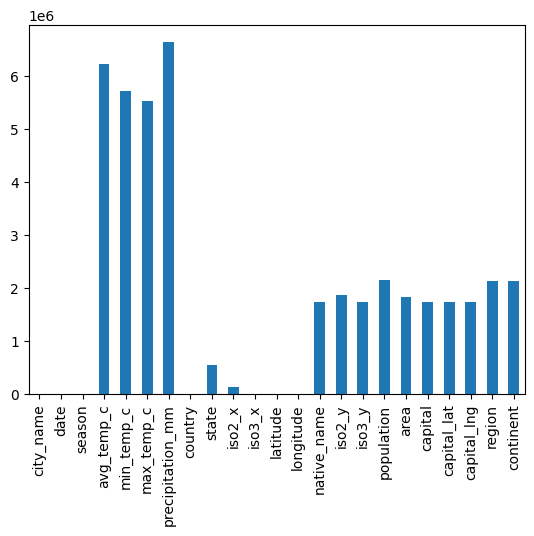

In [6]:
final_df.isna().sum().plot(kind="bar")

In [6]:
final_df.drop(columns=["native_name",'iso2_y','iso3_y','capital_lat','capital_lng','iso2_x','iso3_x'],inplace=True)

<Axes: >

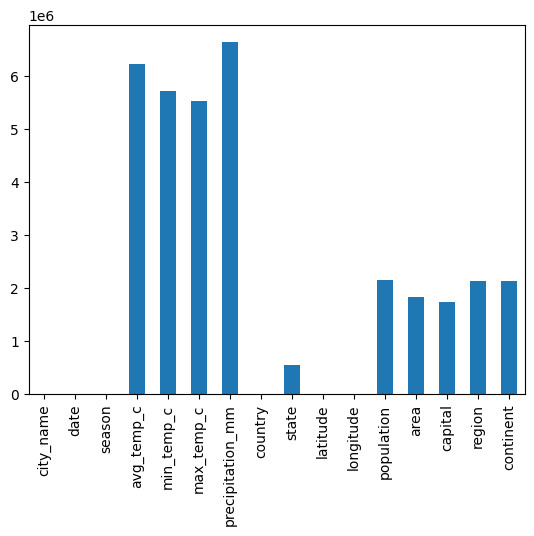

In [7]:
final_df.isna().sum().plot(kind="bar")

<h2>Dropping the rows with null values</h2>

In [8]:
final_df.dropna(subset=['avg_temp_c','precipitation_mm','population','area','continent','state','city_name','capital','region'],inplace=True)

In [11]:
final_df['min_temp_c'] = final_df['min_temp_c'].fillna(final_df['min_temp_c'].mean())

final_df['max_temp_c'] = final_df['max_temp_c'].fillna(final_df['max_temp_c'].median())

print(final_df.isna().sum())
print(final_df.shape)

city_name           0
date                0
season              0
avg_temp_c          0
min_temp_c          0
max_temp_c          0
precipitation_mm    0
country             0
state               0
latitude            0
longitude           0
population          0
area                0
capital             0
region              0
continent           0
dtype: int64
(13650356, 16)


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13650356 entries, 0 to 27678314
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   city_name         object 
 1   date              object 
 2   season            object 
 3   avg_temp_c        float64
 4   min_temp_c        float64
 5   max_temp_c        float64
 6   precipitation_mm  float64
 7   country           object 
 8   state             object 
 9   latitude          float64
 10  longitude         float64
 11  population        float64
 12  area              float64
 13  capital           object 
 14  region            object 
 15  continent         object 
dtypes: float64(8), object(8)
memory usage: 1.7+ GB


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Correlation Matrix</h2>

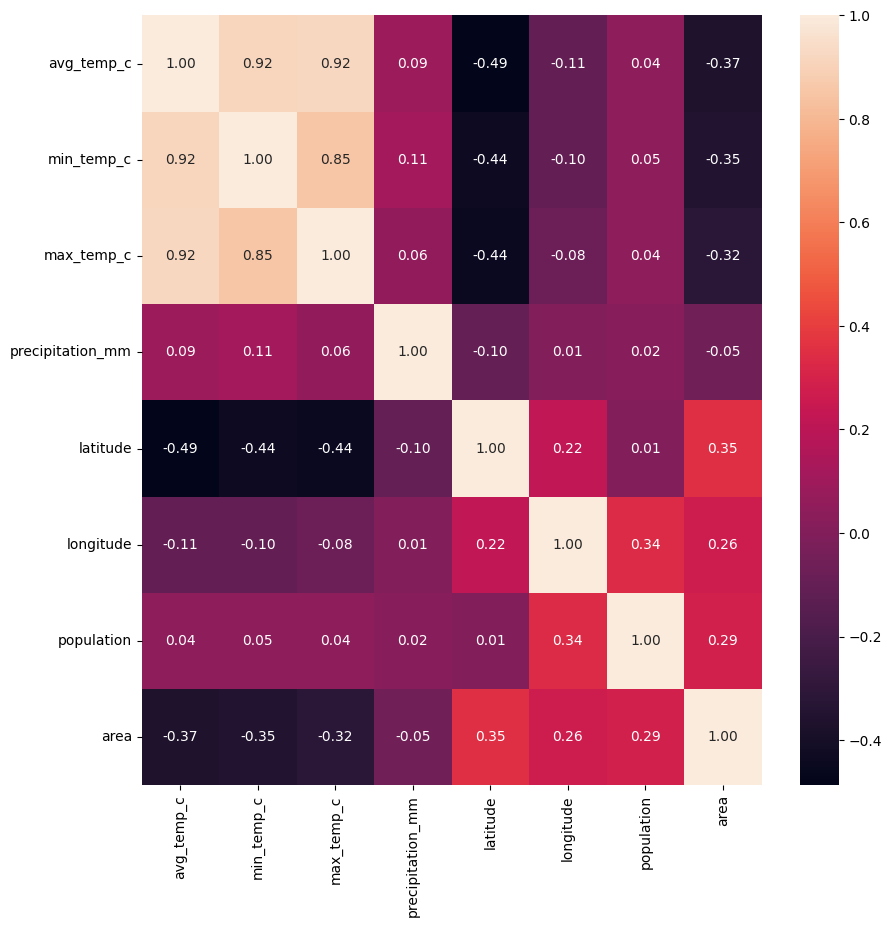

In [14]:
plt.figure(figsize=(10,10))
temp = final_df.drop(columns=['city_name','date','season','country','state','continent','region','capital'])
sns.heatmap(temp.corr(), annot=True, fmt=".2f")
plt.show()

<h2>Handling Categorical variables</h2>
<p>Using one-hot encoding</p>

In [15]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [16]:
final_df = pd.get_dummies(final_df, columns=['season'], drop_first=True)

final_df.head()

,city_name,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,country,state,latitude,longitude,population,area,capital,region,continent,season_Spring,season_Summer,season_Winter
0,Asadabad,1957-07-01,27.0,21.1,35.6,0.0,Afghanistan,Kunar,34.866,71.150005,26023100.0,652230.0,Kabul,Southern and Central Asia,Asia,False,True,False
1,Asadabad,1957-07-02,22.8,18.9,32.2,0.0,Afghanistan,Kunar,34.866,71.150005,26023100.0,652230.0,Kabul,Southern and Central Asia,Asia,False,True,False
2,Asadabad,1957-07-03,24.3,16.7,35.6,1.0,Afghanistan,Kunar,34.866,71.150005,26023100.0,652230.0,Kabul,Southern and Central Asia,Asia,False,True,False
3,Asadabad,1957-07-04,26.6,16.1,37.8,4.1,Afghanistan,Kunar,34.866,71.150005,26023100.0,652230.0,Kabul,Southern and Central Asia,Asia,False,True,False
4,Asadabad,1957-07-05,30.8,20.0,41.7,0.0,Afghanistan,Kunar,34.866,71.150005,26023100.0,652230.0,Kabul,Southern and Central Asia,Asia,False,True,False


<p>Handling categorical values using LabelEncoder</p>

In [17]:
final_df['region'] = le.fit_transform(final_df['region'])
final_df['continent'] = le.fit_transform(final_df['continent'])
final_df['capital'] = le.fit_transform(final_df['capital'])
final_df['country'] = le.fit_transform(final_df['country'])
final_df['state'] = le.fit_transform(final_df['state'])

final_df.head()

,city_name,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,country,state,latitude,longitude,population,area,capital,region,continent,season_Spring,season_Summer,season_Winter
0,Asadabad,1957-07-01,27.0,21.1,35.6,0.0,0,486,34.866,71.150005,26023100.0,652230.0,66,20,2,False,True,False
1,Asadabad,1957-07-02,22.8,18.9,32.2,0.0,0,486,34.866,71.150005,26023100.0,652230.0,66,20,2,False,True,False
2,Asadabad,1957-07-03,24.3,16.7,35.6,1.0,0,486,34.866,71.150005,26023100.0,652230.0,66,20,2,False,True,False
3,Asadabad,1957-07-04,26.6,16.1,37.8,4.1,0,486,34.866,71.150005,26023100.0,652230.0,66,20,2,False,True,False
4,Asadabad,1957-07-05,30.8,20.0,41.7,0.0,0,486,34.866,71.150005,26023100.0,652230.0,66,20,2,False,True,False


In [20]:
final_df.drop(columns=['population','area'],inplace=True)

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13650356 entries, 0 to 27678314
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   city_name         object 
 1   date              object 
 2   avg_temp_c        float64
 3   min_temp_c        float64
 4   max_temp_c        float64
 5   precipitation_mm  float64
 6   country           int64  
 7   state             int64  
 8   latitude          float64
 9   longitude         float64
 10  capital           int64  
 11  region            int64  
 12  continent         int64  
 13  season_Spring     bool   
 14  season_Summer     bool   
 15  season_Winter     bool   
dtypes: bool(3), float64(6), int64(5), object(2)
memory usage: 1.5+ GB


In [22]:
final_df.isna().sum()

city_name           0
date                0
avg_temp_c          0
min_temp_c          0
max_temp_c          0
precipitation_mm    0
country             0
state               0
latitude            0
longitude           0
capital             0
region              0
continent           0
season_Spring       0
season_Summer       0
season_Winter       0
dtype: int64

In [23]:
final_df.to_csv("total_data_version_1.csv",index=False)